### Script - Microdados da Educação Superior 2020

Importando as bibliotecas a serem utilizadas neste projeto. Primeiramente, importaremos as bibliotecas **pandas**, **matplotlib** e **os**. Em seguida, faremos a leitura do dataset.

**Introdução ao Pandas:** Pandas é uma biblioteca para Ciência de Dados de código aberto (open source), construída sobre a linguagem Python, e que providencia uma abordagem rápida e flexível, com estruturas robustas para se trabalhar com dados relacionais (ou rotulados), e tudo isso de maneira simples e intuitiva.

**Introdução ao Matplotlib:** Matplotlib é uma biblioteca compreensiva para criação de visualizações estáticas, animadas, e interativas em Python. Para mais informações sobre essa tecnologia, acesse a documentação MatPlotlib.

**Introdução ao OS:** Biblioteca de comandos do sistema operacional que irá auxiliar a fazer algumas operações dentro do computador.

In [186]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

In [187]:
ies_df = pd.read_csv((os.getcwd() + "/arquivosExcel/CADASTRO_IES_2020.CSV"),
                     encoding='ISO-8859-1', sep=';', low_memory=False)
# os.getcwd() para pegar o caminho do diretório atual
# encoding='ISO-8859-1' para não dar erro de encoding
# sep=';' para separar por ponto e vírgula
# low_memory=False para não dar erro de memória - não é recomendado para arquivos muito grandes

ies_df.head() # Exibindo as 5 primeiras linhas do dataframe para verificar se ocorreu tudo bem com a importação/leitura

# ies_df.columns.to_list() # Exibindo as colunas do dataframe

,NU_ANO_CENSO,NO_REGIAO_IES,CO_REGIAO_IES,NO_UF_IES,SG_UF_IES,CO_UF_IES,NO_MUNICIPIO_IES,CO_MUNICIPIO_IES,IN_CAPITAL_IES,NO_MESORREGIAO_IES,...,DOC_EX_60_MAIS,DOC_EX_BRANCA,DOC_EX_PRETA,DOC_EX_PARDA,DOC_EX_AMARELA,DOC_EX_INDÍGENA,DOC_EX_COR_ND,DOC_EX_BRA,DOC_EX_EST,DOC_EX_COM_DEFICIÊNCIA
0,2020,Norte,1,Rondônia,RO,11,Ariquemes,1100023,0,Leste Rondoniense,...,2,18,1,8,0,0,27,54,0,0
1,2020,Norte,1,Rondônia,RO,11,Ariquemes,1100023,0,Leste Rondoniense,...,3,45,5,17,2,0,0,67,2,0
2,2020,Norte,1,Rondônia,RO,11,Cacoal,1100049,0,Leste Rondoniense,...,9,114,2,31,2,0,3,152,0,0
3,2020,Norte,1,Rondônia,RO,11,Cacoal,1100049,0,Leste Rondoniense,...,1,30,1,4,0,0,4,39,0,0
4,2020,Norte,1,Rondônia,RO,11,Cacoal,1100049,0,Leste Rondoniense,...,0,14,0,7,0,0,18,39,0,0


Começando a fazer os gráficos, agrupando os dados de acordo com os funcionários inscritos por região, docentes de diferentes etnias, gêneros e portadores de deficiências.

In [188]:
regioes = ies_df['NO_REGIAO_IES'].unique() # Pegando as regiões do dataframe

print(regioes) # Exibindo as regiões

['Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-Oeste']


Código para gerar cores aleatórias para as regiões descritas acima, com o objetivo de deixar os gráficos mais dinâmicos.

In [189]:
import random # Importando a biblioteca random

# Dicionário de cores aleatórias para as regiões
regioesCores = {}

# Cores disponíveis para escolha aleatória
coresDisponiveis = ['red', 'blue', 'black', 'green', 'gray']

# Iterando sobre as regiões e atribuindo cores aleatórias
for regiao in regioes:
  if coresDisponiveis:
    cor = random.choice(coresDisponiveis)
    regioesCores[regiao] = cor
    coresDisponiveis.remove(cor)

# Exibindo o dicionário de cores
print(regioesCores)

{'Norte': 'red', 'Nordeste': 'green', 'Sudeste': 'gray', 'Sul': 'black', 'Centro-Oeste': 'blue'}


Análise da Quantidade de Docentes por Região

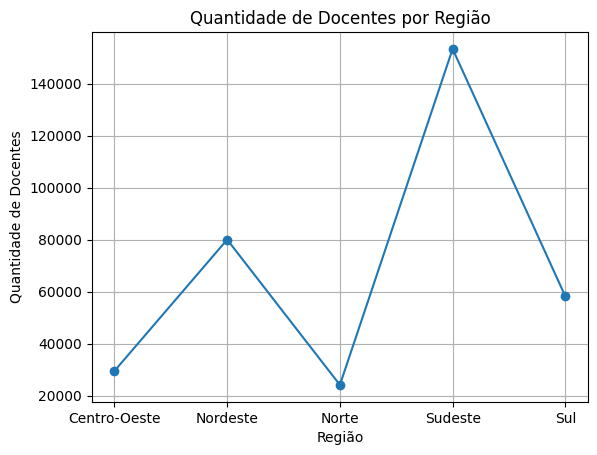

In [190]:
# Agrupar por região e somar a quantidade de técnicos
""" dataAgrupado = ies_df.groupby('NO_REGIAO_IES')['QT_TEC_TOTAL'].sum()

plt.bar(dataAgrupado.index, dataAgrupado.values, marker="o") # Plotando o gráfico de linhas
plt.title('Quantidade de Docentes por Região') # Título do gráfico
plt.xlabel('Região') # Legenda do eixo X
plt.ylabel('Quantidade de Docentes') # Legenda do eixo Y
plt.yticks(dataAgrupado.values) # Definindo os valores do eixo Y
plt.grid(True) # Exibindo as linhas de grade

plt.show() # Exibindo o gráfico """
################## CÓDIGO ACIMA FUNCIONANDO ##################

""" regioesArray = ies_df['NO_REGIAO_IES'].to_numpy() # Pegando as regiões do dataframe
regioesArray = np.unique(regioesArray) # Removendo as regiões duplicadas
print(regioesArray) # Exibindo as regiões
# Exibe: ['Centro-Oeste' 'Nordeste' 'Norte' 'Sudeste' 'Sul']

regiaoCentroOeste = ies_df[ies_df['NO_REGIAO_IES'] == 'Centro-Oeste']["QT_TEC_TOTAL"]
regiaoNordeste = ies_df[ies_df['NO_REGIAO_IES'] == 'Nordeste']["QT_TEC_TOTAL"]
regiaoNorte = ies_df[ies_df['NO_REGIAO_IES'] == 'Norte']["QT_TEC_TOTAL"]
regiaoSudeste = ies_df[ies_df['NO_REGIAO_IES'] == 'Sudeste']["QT_TEC_TOTAL"]
regiaoSul = ies_df[ies_df['NO_REGIAO_IES'] == 'Sul']["QT_TEC_TOTAL"]

#plt.plot(regioesArray, regiaoCentroOeste, label="Centro-Oeste") # Plotando o gráfico de linhas

# Guardar esse, pois será o código da mudança de cores de acordo com a região
# # plt.plot(regioesArray, regiaoCentroOeste, label="Centro-Oeste", color=regioesCores['Centro-Oeste']) # Plotando o gráfico de linhas

# Usar o dicionário de cores para definir a cor de cada linha no gráfico
plt.plot(regioesArray, regiaoCentroOeste, label="Centro-Oeste", color=regioesCores['Centro-Oeste'])
plt.plot(regioesArray, regiaoNordeste, label="Nordeste", color=regioesCores['Nordeste'])
plt.plot(regioesArray, regiaoNorte, label="Norte", color=regioesCores['Norte'])
plt.plot(regioesArray, regiaoSudeste, label="Sudeste", color=regioesCores['Sudeste'])
plt.plot(regioesArray, regiaoSul, label="Sul", color=regioesCores['Sul'])

plt.legend(loc="best") # Exibindo a legenda

plt.title('Quantidade de Docentes por Região') # Título do gráfico

plt.xticks(rotation=75) # Rotacionando os nomes das regiões

plt.show() """

# Pegando as regiões do dataframe

""" regioesArray = ies_df['NO_REGIAO_IES'].to_numpy()
regioesArray = np.unique(regioesArray)  # Removendo as regiões duplicadas

regiaoCentroOeste = ies_df[ies_df['NO_REGIAO_IES'] == 'Centro-Oeste']["QT_TEC_TOTAL"]
regiaoNordeste = ies_df[ies_df['NO_REGIAO_IES'] == 'Nordeste']["QT_TEC_TOTAL"]
regiaoNorte = ies_df[ies_df['NO_REGIAO_IES'] == 'Norte']["QT_TEC_TOTAL"]
regiaoSudeste = ies_df[ies_df['NO_REGIAO_IES'] == 'Sudeste']["QT_TEC_TOTAL"]
regiaoSul = ies_df[ies_df['NO_REGIAO_IES'] == 'Sul']["QT_TEC_TOTAL"]

# Usar o dicionário de cores para definir a cor de cada linha no gráfico
plt.plot(regioesArray, regiaoCentroOeste, label="Centro-Oeste", color=regioesCores['Centro-Oeste'])
plt.plot(regioesArray, regiaoNordeste, label="Nordeste", color=regioesCores['Nordeste'])
plt.plot(regioesArray, regiaoNorte, label="Norte", color=regioesCores['Norte'])
plt.plot(regioesArray, regiaoSudeste, label="Sudeste", color=regioesCores['Sudeste'])
plt.plot(regioesArray, regiaoSul, label="Sul", color=regioesCores['Sul'])

plt.legend(loc="best") # Exibindo a legenda

plt.title('Quantidade de Docentes por Região') # Título do gráfico

plt.xticks(rotation=75) # Rotacionando os nomes das regiões

plt.show() # Exibindo o gráfico """

dataDocTotal = ies_df.groupby('NO_REGIAO_IES')['QT_TEC_TOTAL'].sum()

plt.plot(dataDocTotal.index, dataDocTotal.values, marker="o") # Plotando o gráfico de linhas

plt.title('Quantidade de Docentes por Região') # Título do gráfico

plt.xlabel('Região') # Legenda do eixo X
plt.ylabel('Quantidade de Docentes') # Legenda do eixo Y

plt.grid(True) # Exibindo as linhas de grade

plt.show() # Exibindo o gráfico

Análise da Quantidade de Docentes Negros por Região